In [106]:
import pandas as pd 
import numpy as np
import glob
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
path =r'C:\Continuum\Anaconda2\envs\TFENV\IPL_MOST_RUNS' # use your path
allFiles = glob.glob(path + "/*.csv")
df_ms_runs = pd.DataFrame()
list_ = []
for file_ in allFiles:
    df = pd.read_csv(file_,index_col=0)
    team = (file_.rsplit('.csv', 1)[0]).rsplit('_', 1)[1]
    year = (file_.rsplit('.csv', 1)[0]).rsplit('_', 2)[1]
    df['team'] = team
    df['year'] = year
    list_.append(df)
df_ms_runs = pd.concat(list_)


In [11]:
df_ms_runs['status'] = 'DQ'

In [12]:
df_ms_runs.loc[((df_ms_runs['year'] == '2017') & (df_ms_runs['team'] == 'MI')),'status']='W'
df_ms_runs.loc[((df_ms_runs['year'] == '2017') & (df_ms_runs['team'] == 'RPS')),'status']='R'
df_ms_runs.loc[((df_ms_runs['year'] == '2016') & (df_ms_runs['team'] == 'SRH')),'status']='W'
df_ms_runs.loc[((df_ms_runs['year'] == '2016') & (df_ms_runs['team'] == 'RCB')),'status']='R'
df_ms_runs.loc[((df_ms_runs['year'] == '2015') & (df_ms_runs['team'] == 'MI')),'status']='W'
df_ms_runs.loc[((df_ms_runs['year'] == '2015') & (df_ms_runs['team'] == 'CSK')),'status']='R'
df_ms_runs.loc[((df_ms_runs['year'] == '2014') & (df_ms_runs['team'] == 'KKR')),'status']='W'
df_ms_runs.loc[((df_ms_runs['year'] == '2014') & (df_ms_runs['team'] == 'KP')),'status']='R'
df_ms_runs.loc[((df_ms_runs['year'] == '2013') & (df_ms_runs['team'] == 'MI')),'status']='W'
df_ms_runs.loc[((df_ms_runs['year'] == '2013') & (df_ms_runs['team'] == 'CSK')),'status']='R'
df_ms_runs.loc[((df_ms_runs['year'] == '2012') & (df_ms_runs['team'] == 'KKR')),'status']='W'
df_ms_runs.loc[((df_ms_runs['year'] == '2012') & (df_ms_runs['team'] == 'CSK')),'status']='R'

df_ms_runs.loc[((df_ms_runs['year'] == '2017') & (df_ms_runs['team'] == 'SRH')),'status']='Q'
df_ms_runs.loc[((df_ms_runs['year'] == '2017') & (df_ms_runs['team'] == 'KKR')),'status']='Q'
df_ms_runs.loc[((df_ms_runs['year'] == '2016') & (df_ms_runs['team'] == 'GL')),'status']='Q'
df_ms_runs.loc[((df_ms_runs['year'] == '2016') & (df_ms_runs['team'] == 'KKR')),'status']='Q'
df_ms_runs.loc[((df_ms_runs['year'] == '2015') & (df_ms_runs['team'] == 'RR')),'status']='Q'
df_ms_runs.loc[((df_ms_runs['year'] == '2015') & (df_ms_runs['team'] == 'RCB')),'status']='Q'
df_ms_runs.loc[((df_ms_runs['year'] == '2014') & (df_ms_runs['team'] == 'MI')),'status']='Q'
df_ms_runs.loc[((df_ms_runs['year'] == '2014') & (df_ms_runs['team'] == 'CSK')),'status']='Q'
df_ms_runs.loc[((df_ms_runs['year'] == '2013') & (df_ms_runs['team'] == 'RR')),'status']='Q'
df_ms_runs.loc[((df_ms_runs['year'] == '2012') & (df_ms_runs['team'] == 'DD')),'status']='Q'
df_ms_runs.loc[((df_ms_runs['year'] == '2012') & (df_ms_runs['team'] == 'MI')),'status']='Q'

In [3]:
cols = list(df_ms_runs.columns)

In [4]:
df_ms_runs[cols] = df_ms_runs[cols].astype(object)

In [5]:
for col in cols:
    df_ms_runs[''''''+str(col)+''''''][df_ms_runs[''''''+str(col)+''''''] == '-'] = 0.0

In [6]:
#df_ms_runs
#df_ms_runs.to_csv('df_ms_runs.csv')

In [7]:
cols =['Mat','Inns','NO','Runs','100','50','0','4s','6s','BF']
df_ms_runs[cols] = df_ms_runs[cols].astype(int)

In [10]:
flot_cols = ['Ave','SR']
df_ms_runs[flot_cols] = df_ms_runs[flot_cols].apply(pd.to_numeric)

In [91]:
df_batsmen = df_ms_runs[df_ms_runs['Inns'].astype(float) > 0.0]

In [92]:
df_batsmen.reset_index(drop=True,inplace=True)

In [93]:
df_batsmen.drop(df_batsmen[df_batsmen['team'] == 'DC'].index ,inplace= True)
df_batsmen.drop(df_batsmen[df_batsmen['team'] == 'PW'].index , inplace= True)


C:\Continuum\Anaconda2\envs\TFENV\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Continuum\Anaconda2\envs\TFENV\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [141]:
def get_batting_statistics(df,parameter, statistic,output):
    df = df.groupby(['year','team','status'], as_index='False').agg({parameter: statistic}).apply(lambda x : round(x,2))
    df.reset_index(level = ['team','year','status'], inplace=True)
    piv_tbl = df.pivot(columns='team', values= output, index='year')
    return piv_tbl

# Qualification Status of all the Teams

In [143]:
df = get_batting_statistics(df_batsmen,'Runs','max','status')
print (df)

team   CSK  DD    GL KKR  KP  MI RCB   RPS    RR   SRH
year                                                  
2012     R   Q  None   W  DQ   Q  DQ  None    DQ  None
2013     R  DQ  None  DQ  DQ   W  DQ  None     Q    DQ
2014     Q  DQ  None   W   R   Q  DQ  None    DQ    DQ
2015     R  DQ  None  DQ  DQ   W   Q  None     Q    DQ
2016  None  DQ     Q   Q  DQ  DQ   R    DQ  None     W
2017  None  DQ    DQ   Q  DQ   W  DQ     R  None     Q


# Mean/Max/Min Runs scored by the batsmen of all Teams

team     CSK      DD      GL     KKR      KP      MI     RCB     RPS      RR  \
year                                                                           
2012  181.13  119.14     NaN  168.29  108.86  106.05  123.74     NaN  149.56   
2013  166.94  100.14     NaN  101.62  121.68  177.81  121.50     NaN  135.32   
2014  209.92  104.11     NaN  148.25  166.12  131.47  110.67     NaN   98.05   
2015  197.23  128.81     NaN  121.19  104.94  153.59  115.26     NaN  135.87   
2016     NaN  110.83  136.35  133.31  102.55  123.00  168.41  103.26     NaN   
2017     NaN  118.39  128.28  123.89  116.61  154.24   97.78  118.50     NaN   

team     SRH  
year          
2012     NaN  
2013  128.12  
2014  121.44  
2015  132.31  
2016  159.31  
2017  141.38  


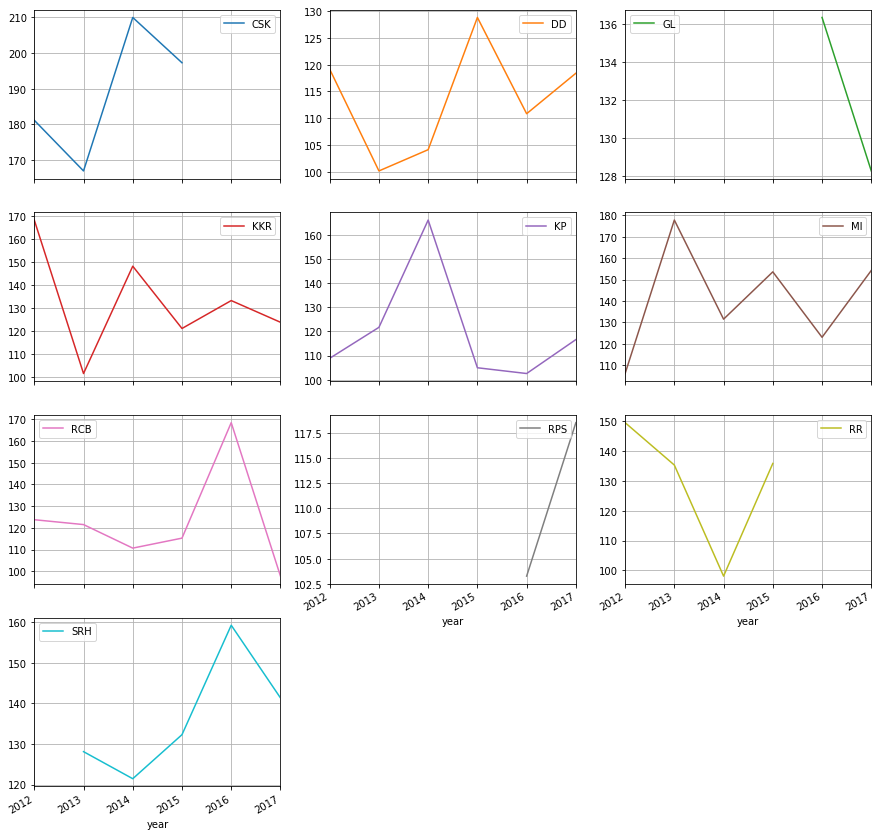

In [144]:
df = get_batting_statistics(df_batsmen,'Runs','mean','Runs')
print (df)
axes = df.plot(kind = 'line',grid = True,subplots = True , layout=(5,3), figsize = (15,20) )

# Mean/Max/Min Average of the batsmen of all Teams

team    CSK     DD     GL    KKR     KP     MI    RCB   RPS     RR    SRH
year                                                                     
2012  15.91  19.70    NaN  20.20  15.00   9.91   7.75   NaN  19.50    NaN
2013  15.22  16.00    NaN  15.00  13.50  18.46  13.53   NaN   9.75  17.41
2014  28.37  14.37    NaN  17.66  25.00  13.33  14.33   NaN  13.40  15.71
2015  19.25  19.82    NaN  15.47  12.04  20.40  10.00   NaN  16.77  21.68
2016    NaN  11.42  12.37  16.40  15.98  17.70  13.76  21.0    NaN  17.91
2017    NaN  17.16  17.61  15.75  17.62  19.57  13.72  11.5    NaN  25.75


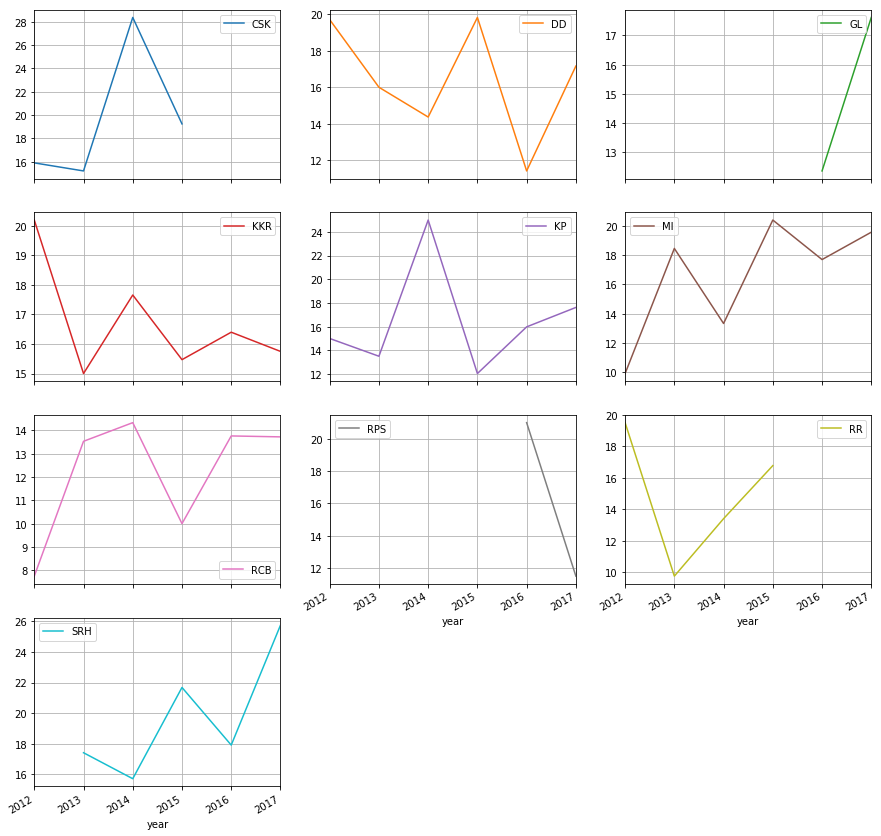

In [145]:
df= get_batting_statistics(df_batsmen,'Ave','median','Ave')
print (df)
axes = df.plot(kind = 'line',grid = True,subplots = True , layout=(5,3), figsize = (15,20) )

# Mean/Max/Min Strike Rate of the batsmen of all Teams

team     CSK      DD      GL     KKR      KP      MI     RCB     RPS      RR  \
year                                                                           
2012  125.58   95.33     NaN  123.29  127.89   87.14  117.02     NaN  113.53   
2013   87.70   98.44     NaN  103.41  101.84  107.55  101.03     NaN   91.69   
2014  124.08   92.09     NaN  109.87  111.38  100.44  128.54     NaN  109.31   
2015  121.70  106.68     NaN  123.22  102.01  116.13  125.53     NaN  111.61   
2016     NaN   98.38  104.23  112.88  119.65  109.64  123.04  100.56     NaN   
2017     NaN  110.06  104.23  111.48  111.58  139.52   98.74  109.26     NaN   

team     SRH  
year          
2012     NaN  
2013   97.56  
2014   95.26  
2015  120.98  
2016  127.58  
2017  107.49  


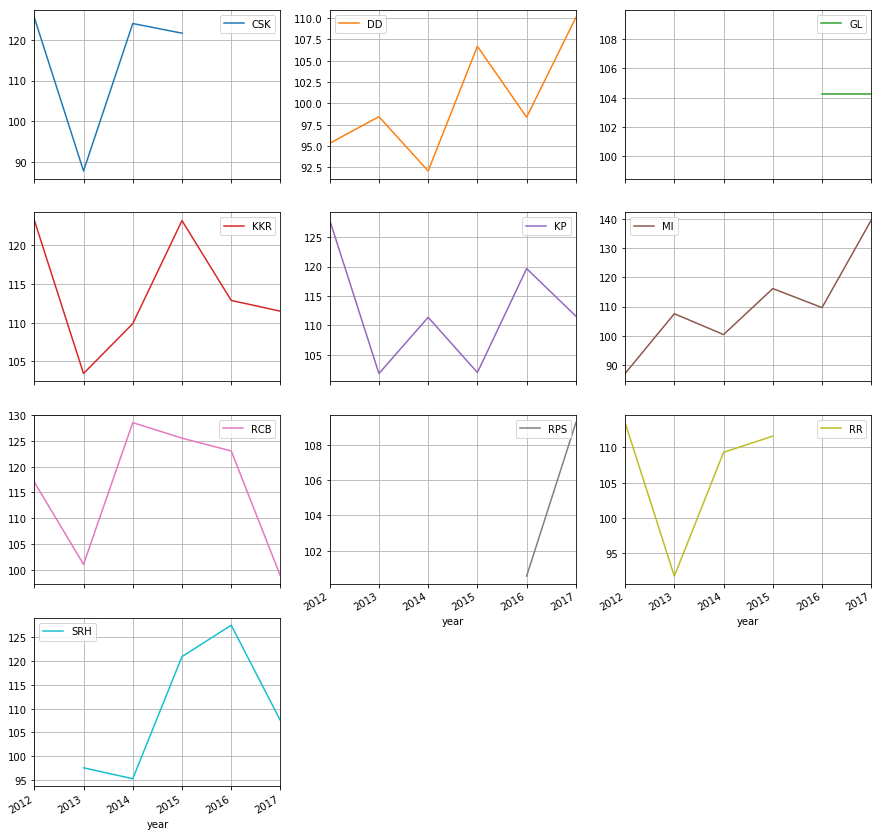

In [146]:
df=get_batting_statistics(df_batsmen,'SR','mean','SR')
print (df)
axes = df.plot(kind = 'line',grid = True,subplots = True , layout=(5,3), figsize = (15,20) )

# Mean/Max/Min Number of 6's hit by batsmen of all Teams

team    CSK    DD    GL   KKR     KP     MI    RCB   RPS    RR   SRH
year                                                                
2012  102.0  97.0   NaN  69.0   61.0   79.0  117.0   NaN  69.0   NaN
2013   84.0  50.0   NaN  56.0   65.0  117.0  104.0   NaN  70.0  51.0
2014  112.0  63.0   NaN  76.0  127.0   86.0   92.0   NaN  86.0  72.0
2015   96.0  84.0   NaN  64.0   79.0  120.0  105.0   NaN  65.0  79.0
2016    NaN  65.0  63.0  65.0   54.0   92.0  142.0  68.0   NaN  89.0
2017    NaN  87.0  92.0  87.0   88.0  117.0   75.0  89.0   NaN  70.0


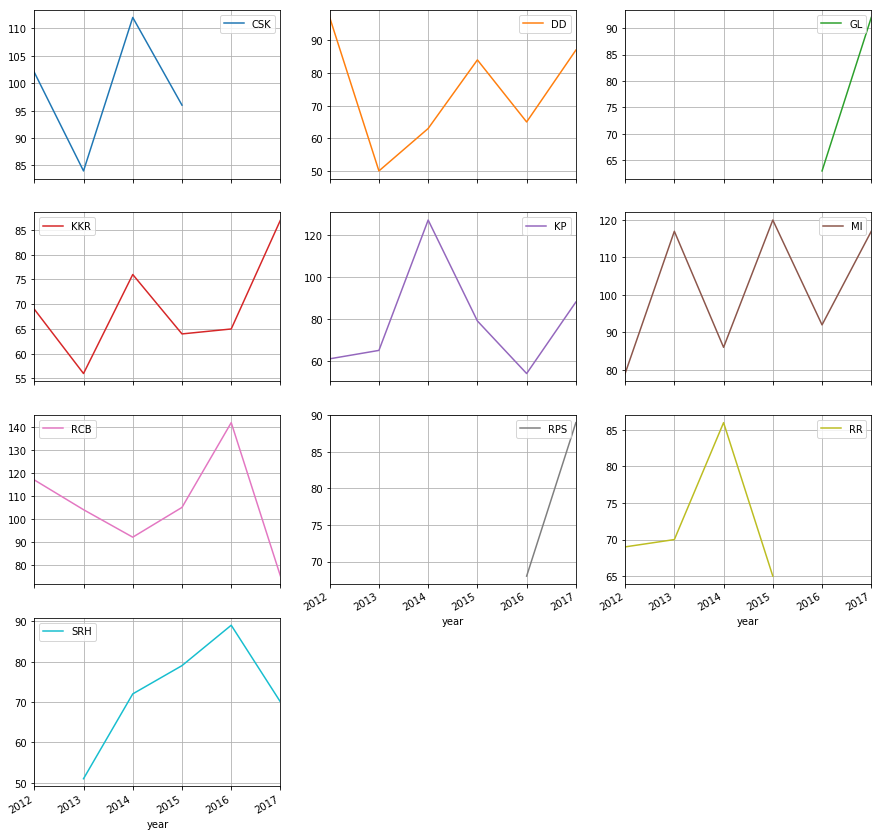

In [147]:
df=get_batting_statistics(df_batsmen,'6s','sum','6s')
print (df)
axes = df.plot(kind = 'line',grid = True,subplots = True , layout=(5,3), figsize = (15,20) )

# Mean/Max/Min Number of 4's hit by batsmen of all Teams

team    CSK     DD     GL    KKR     KP     MI    RCB    RPS     RR    SRH
year                                                                      
2012  223.0  232.0    NaN  210.0  226.0  219.0  186.0    NaN  246.0    NaN
2013  241.0  210.0    NaN  222.0  244.0  252.0  229.0    NaN  267.0  197.0
2014  205.0  177.0    NaN  223.0  262.0  197.0  165.0    NaN  166.0  167.0
2015  249.0  188.0    NaN  206.0  144.0  242.0  206.0    NaN  187.0  185.0
2016    NaN  179.0  242.0  194.0  191.0  185.0  239.0  171.0    NaN  231.0
2017    NaN  202.0  218.0  228.0  187.0  224.0  133.0  197.0    NaN  220.0


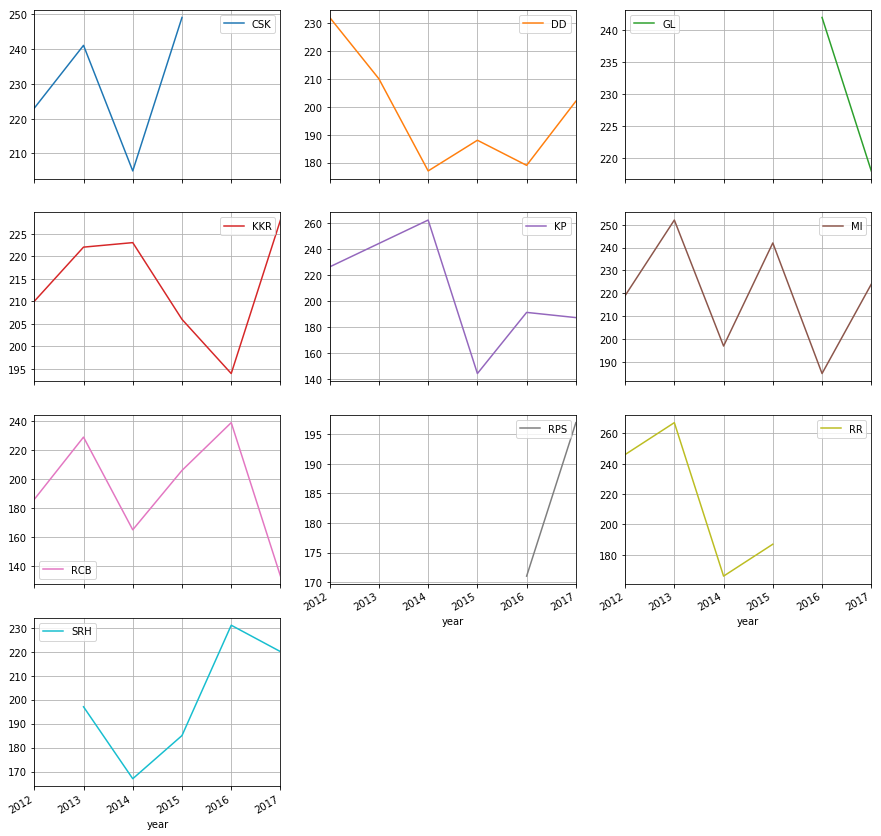

In [148]:
df = get_batting_statistics(df_batsmen,'4s','sum','4s')
print (df)
axes = df.plot(kind = 'line',grid = True,subplots = True , layout=(5,3), figsize = (15,20) )

# Mean/Max/Min Number of 50's scored by batsmen of all Teams

team   CSK    DD    GL   KKR    KP    MI   RCB   RPS    RR   SRH
year                                                            
2012  15.0  21.0   NaN  14.0  21.0  22.0  19.0   NaN  16.0   NaN
2013  16.0  21.0   NaN  21.0  19.0  16.0  20.0   NaN  19.0  17.0
2014  12.0  19.0   NaN  16.0  17.0  17.0  18.0   NaN  21.0  16.0
2015  13.0  16.0   NaN  16.0  18.0  17.0  19.0   NaN  15.0  16.0
2016   NaN  18.0  17.0  16.0  20.0  17.0  17.0  19.0   NaN  16.0
2017   NaN  18.0  18.0  19.0  18.0  17.0  18.0  20.0   NaN  16.0


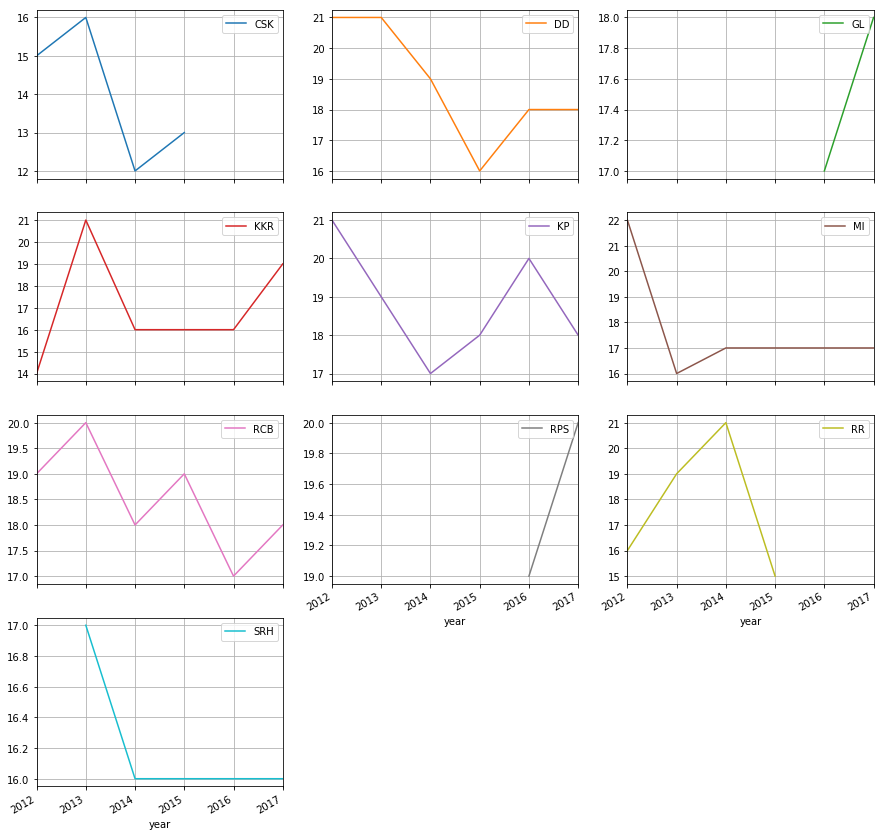

In [150]:
df = get_batting_statistics(df_batsmen,'50','count','50')
print (df)
axes = df.plot(kind = 'line',grid = True,subplots = True , layout=(5,3), figsize = (15,20) )

In [152]:
df_batsmen

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s,team,year,status
0,DJ Bravo,19,16,8,371,48,46.37,264,140.53,0,0,0,20,20,CSK,2012,R
1,F du Plessis,13,12,0,398,73,33.16,304,130.92,0,3,0,29,17,CSK,2012,R
2,MEK Hussey,8,8,0,261,56,32.62,236,110.59,0,2,0,28,8,CSK,2012,R
3,MS Dhoni,19,17,5,358,51*,29.83,278,128.77,0,1,0,26,9,CSK,2012,R
4,S Badrinath,15,9,2,196,57,28.00,181,108.28,0,1,0,23,2,CSK,2012,R
5,SK Raina,19,18,1,441,73,25.94,325,135.69,0,1,2,36,19,CSK,2012,R
6,M Vijay,14,14,1,336,113,25.84,267,125.84,1,0,2,39,10,CSK,2012,R
7,RA Jadeja,19,14,2,191,48,15.91,151,126.49,0,0,0,13,9,CSK,2012,R
8,JA Morkel,16,12,5,107,28,15.28,68,157.35,0,0,1,5,6,CSK,2012,R
9,R Ashwin,19,5,2,18,8,6.00,15,120.00,0,0,1,2,0,CSK,2012,R
